In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
# from astropy.stats import sigma_clip
import itertools, os
import plotly.graph_objects as go

In [2]:
train_adc_info = pd.read_csv('/kaggle/input/ariel-data-challenge-2024/train_adc_info.csv',
                           index_col='planet_id')
axis_info = pd.read_parquet('/kaggle/input/ariel-data-challenge-2024/axis_info.parquet')
train_labels = pd.read_csv("/kaggle/input/ariel-data-challenge-2024/train_labels.csv")
train_labels = np.array(train_labels)

sample_sub = pd.read_csv('/kaggle/input/ariel-data-challenge-2024/sample_submission.csv')

pre_train_187 = np.load("/kaggle/input/preprocessed-train-187/pre_train.npy")
pre_test_187 = np.load("/kaggle/input/preprocessed-train-187/pre_test.npy")
pre_train_375 = np.load("/kaggle/input/preproceesed-data-375/pre_train_375.npy")
pre_test_375 = np.load("/kaggle/input/preproceesed-data-375/pre_test_375.npy")

In [3]:
def classificator(column : str, value: int, data = train_adc_info):
    included_index_list = []
    excluded_index_list = []
    
    for i in range(len(data)):
        if data.iloc[i]['star'] == 1: included_index_list.append(i)
        else: excluded_index_list.append(i)
    return included_index_list, excluded_index_list
        

In [4]:
indexes, exdexes = classificator('star', 1)
solar_1_labels = train_labels[indexes]
solar_0_labels = train_labels[exdexes]

In [6]:
indexes, exdexes = classificator('star', 1)
solar_1_train_375 = pre_train_375[indexes]
solar_0_train_375 = pre_train_375[exdexes]
solar_1_train_187 = pre_train_187[indexes]
solar_0_train_187 = pre_train_187[exdexes]

In [7]:
sub_545 = pd.read_csv("/kaggle/input/submissions/submission_545.csv")
sub_254 = pd.read_csv("/kaggle/input/submissions/submission_254.csv")
sub_339 = pd.read_csv("/kaggle/input/submissions/submission_339.csv")
sub_381 = pd.read_csv("/kaggle/input/submissions/submission_381.csv")

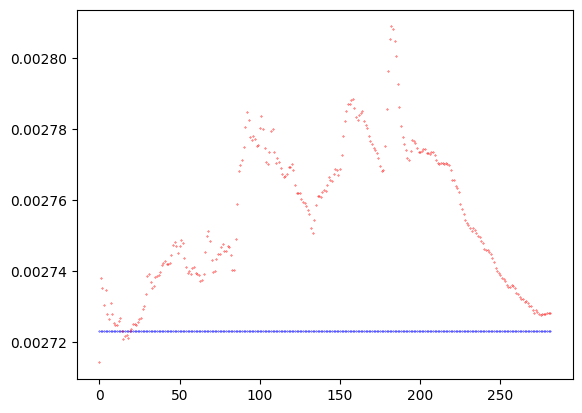

In [8]:
plt.plot(figsize=(7,10))
plt.scatter(x=np.arange(282), y=sub_545.values[0][1:283], s=.1, c='b')
plt.scatter(x=np.arange(282), y=sub_339.values[0][1:283], s=.1, c='r')
plt.show()

1 ~ 283 wl        
294 ~ 567 sigma

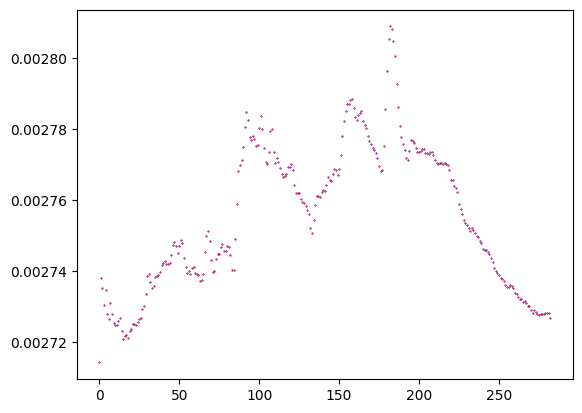

In [9]:
plt.plot(figsize=(7,10))
plt.scatter(x=np.arange(283), y=sub_381.values[0][1:284], s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_339.values[0][1:284], s=.1, c='r')
plt.show()

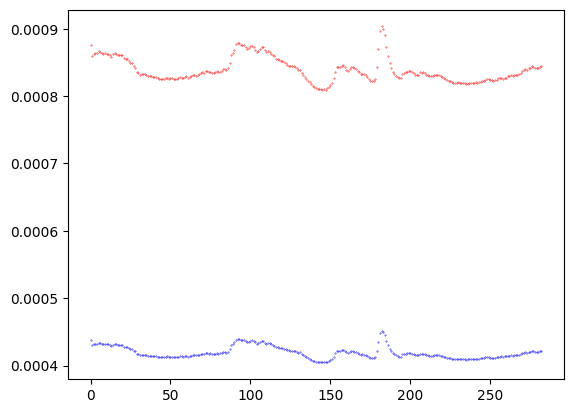

In [10]:
plt.plot(figsize=(7,10))
plt.scatter(x=np.arange(283), y=sub_381.values[0][284:], s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_339.values[0][284:], s=.1, c='r')
plt.show()

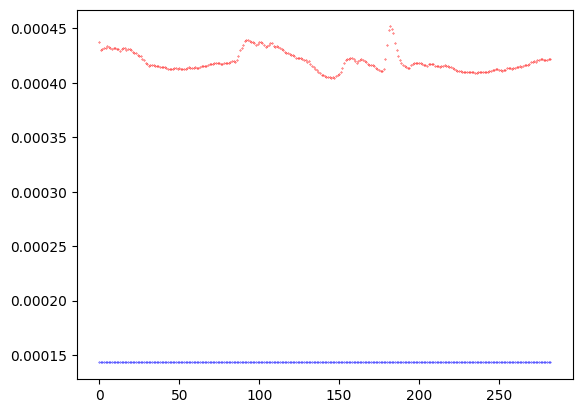

In [11]:
plt.plot(figsize=(7,10))
plt.scatter(x=np.arange(283), y=sub_545.values[0][284:], s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_381.values[0][284:], s=.1, c='r')
plt.show()

In [12]:
sub_545_values = sub_545.values.copy()
sub_381_values = sub_381.values.copy()


In [13]:
sub_381_minus_std = sub_381_values[0][1:284]-sub_381_values[0][284:]
sub_381_plus_std = sub_381_values[0][1:284]+sub_381_values[0][284:]
sub_545_minus_std = sub_545_values[0][1:284]-sub_545_values[0][284:]
sub_545_plus_std = sub_545_values[0][1:284]+sub_545_values[0][284:]

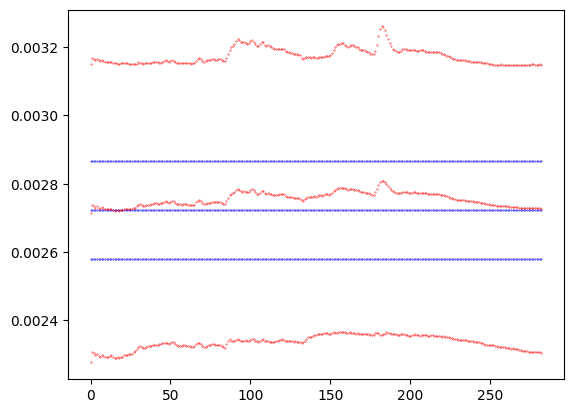

In [14]:
plt.plot(figsize=(7,10))
plt.scatter(x=np.arange(283), y=sub_545.values[0][1:284], s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_381.values[0][1:284], s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_381_minus_std, s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_381_plus_std, s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_545_minus_std, s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_545_plus_std, s=.1, c='b')
plt.show()

In [15]:
sub_000_012 = pd.read_csv("/kaggle/input/submissions/submission_000_0.012.csv")
sub_000_017 = pd.read_csv("/kaggle/input/submissions/submission_000_0.017.csv")

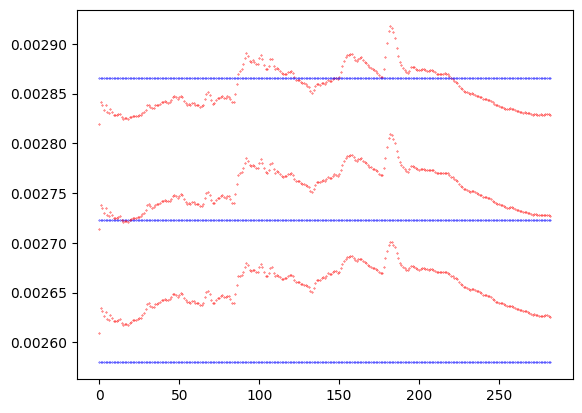

In [16]:
plt.plot(figsize=(7,10))
plt.scatter(x=np.arange(283), y=sub_545.values[0][1:284], s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_000_012.values[0][1:284], s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_000_012.values[0][1:284]-sub_000_012.values[0][284:], s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_000_012.values[0][1:284]+sub_000_012.values[0][284:], s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_545_minus_std, s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_545_plus_std, s=.1, c='b')
plt.show()

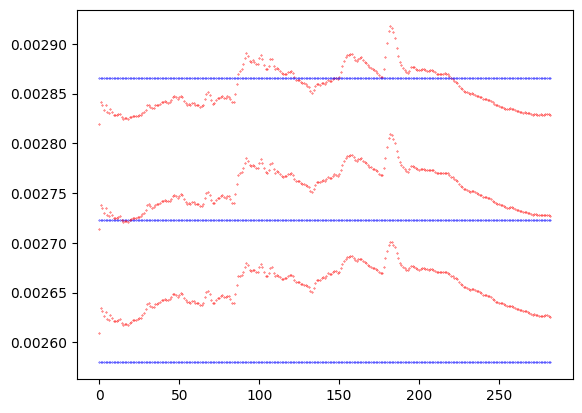

In [17]:
plt.plot(figsize=(7,10))
plt.scatter(x=np.arange(283), y=sub_545.values[0][1:284], s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_000_017.values[0][1:284], s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_000_017.values[0][1:284]-sub_000_012.values[0][284:], s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_000_017.values[0][1:284]+sub_000_012.values[0][284:], s=.1, c='r')
plt.scatter(x=np.arange(283), y=sub_545_minus_std, s=.1, c='b')
plt.scatter(x=np.arange(283), y=sub_545_plus_std, s=.1, c='b')
plt.show()